In [1]:
import csv,sys,os
import argparse
from math import sqrt
from pprint import pprint
import numpy as np
import fitsio
import matplotlib.pyplot as plt
from pandas import DataFrame
import pdb
import pylab as py
from matplotlib import gridspec
from astropy.io import fits

In [1]:
from dither_plot import *

In [8]:
pwd()

'/n/home/desiobserver/dithertest'

# plot_dither_seq_fc()



*  **plot_dither_seq_fc()** function in dither_plot.py  for a given sequence of exposures and list of active petals:

      (1) plots the focal plane layout for each exposure 
      (2) plots the delta_ra and delta_dec for all the listed petals from the ORIGINAL and DITHERED tiles from their associated fiberassign files
      


**inputs**:

- **seqlist**:        List of observed spectroscopic exposures in dither raster request script, e.g., [30180,30156,30148,30140,30136,30132]

- **obsday**:         date of observation, e.g., 20191126

- **petalnum_list**:  list of used petals [where its positioners can move] 

- **channel**:        one of the three channels od the spectrograph: B, R or Z; e.g., b'B'

- **tileid**:         The TILEID of the DITHERED tile

- **nightwatch_dir**:  the path where the qa-{expid}.fits files are stored e.g., '/exposures/nightwatch/'

- **fiberassign_dir**: the path where the fiberassign files are stored  e.g., '/data/tiles/ALL_tiles/20191119/'

- **plotout_dir**:     the path where the output plots are saved e.g., './' 

- **snr_thresh**:       threshold above which we call a fiber "lit" e.g., 1.0    


     



original assignment is: /uufs/chpc.utah.edu/common/home/bolton-group1/bolton_data2/kdawson/sarahE/public_html_repo/cmx/tiles/DITHERING/Dec2019/Tile_63068//fiberassign-063067.fits
Dithered assignment is: /uufs/chpc.utah.edu/common/home/bolton-group1/bolton_data2/kdawson/sarahE/public_html_repo/cmx/tiles/DITHERING/Dec2019/Tile_63068//fiberassign-063068.fits
if these are not the correct files to be used, stop the script now!



/uufs/chpc.utah.edu/common/home/bolton-group1/bolton_data2/kdawson/sarahE/git_repo/desicmx/analysis/dither/dither_plot.py:395: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if ((df[df['snr']>snr_thresh].size >0) & (df[df['snr']>snr_thresh][df['r']<225].size >0)) :


None of the fibers in qa-00030180.fits have landed on a source (snr >1.0) in petal 0
None of the fibers in qa-00030180.fits have landed on a source (snr >1.0) in petal 2


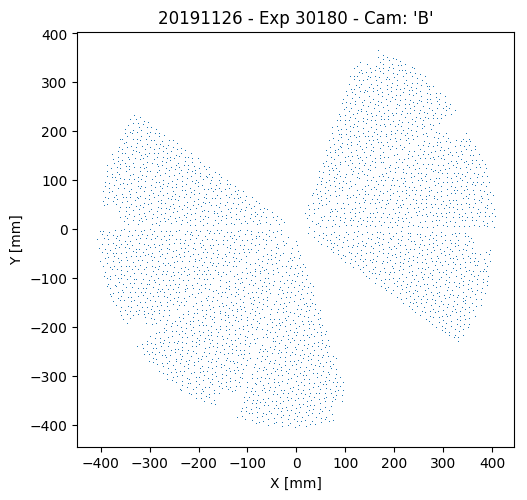

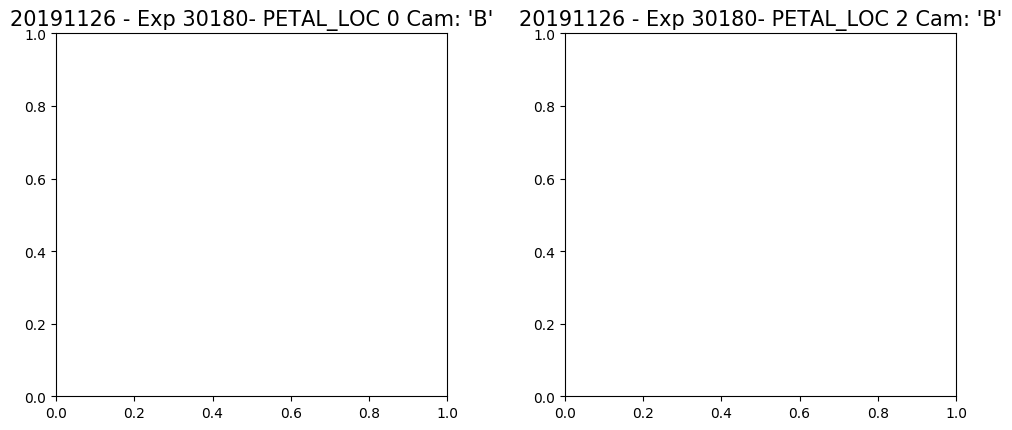

_________________________________________________________________________________



/uufs/chpc.utah.edu/common/home/bolton-group1/bolton_data2/kdawson/sarahE/git_repo/desicmx/analysis/dither/dither_plot.py:403: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['snr']>snr_thresh][df['r']<225].plot(kind='scatter', x='dra', y='ddec', color='red', ax=ax)


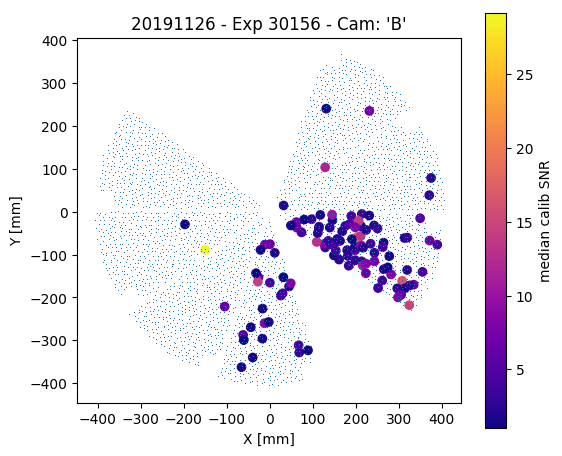

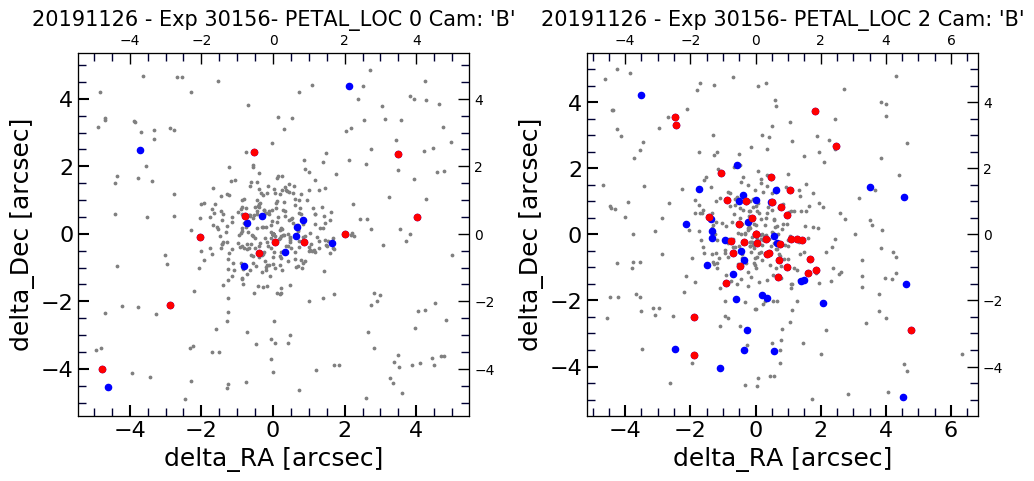

_________________________________________________________________________________

None of the fibers in qa-00030148.fits have landed on a source (snr >1.0) in petal 0
None of the fibers in qa-00030148.fits have landed on a source (snr >1.0) in petal 2


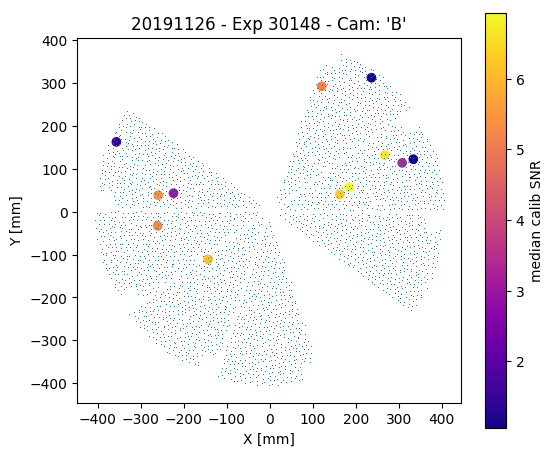

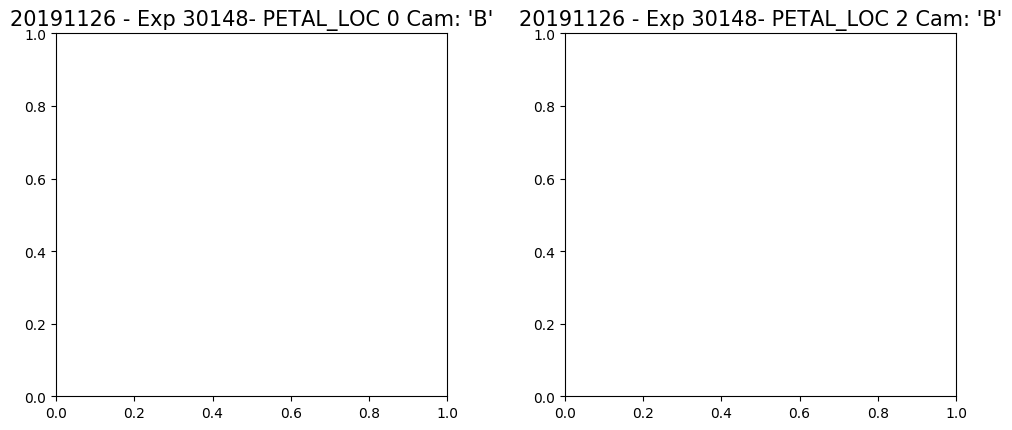

_________________________________________________________________________________

None of the fibers in qa-00030140.fits have landed on a source (snr >1.0) in petal 2


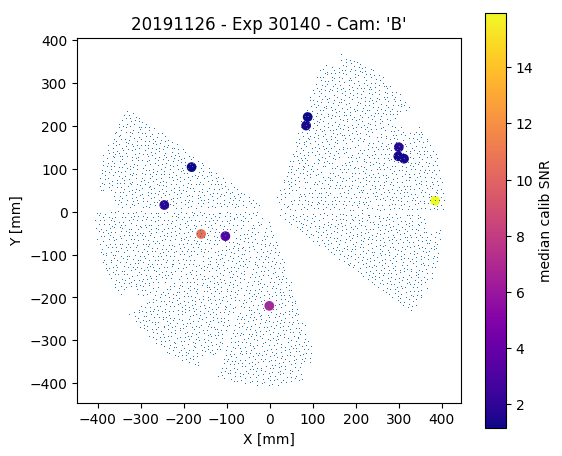

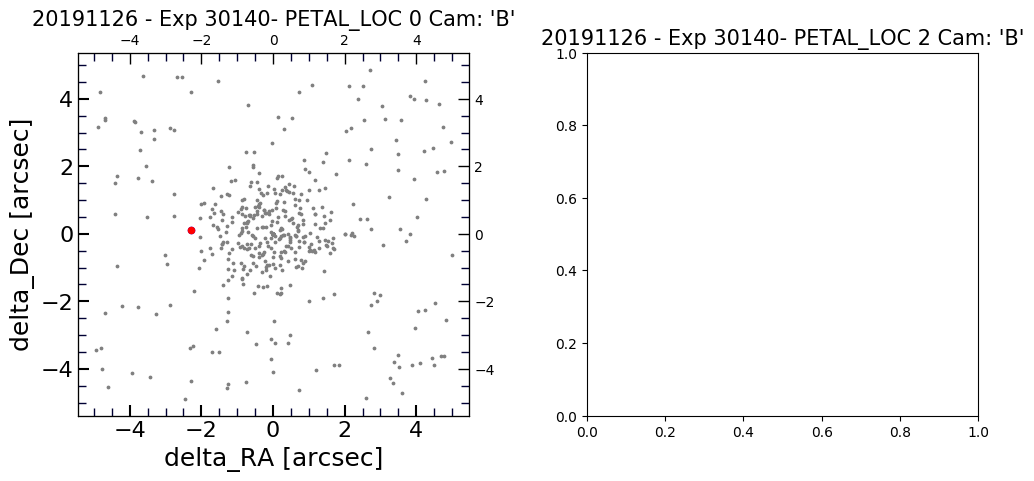

_________________________________________________________________________________

None of the fibers in qa-00030136.fits have landed on a source (snr >1.0) in petal 2


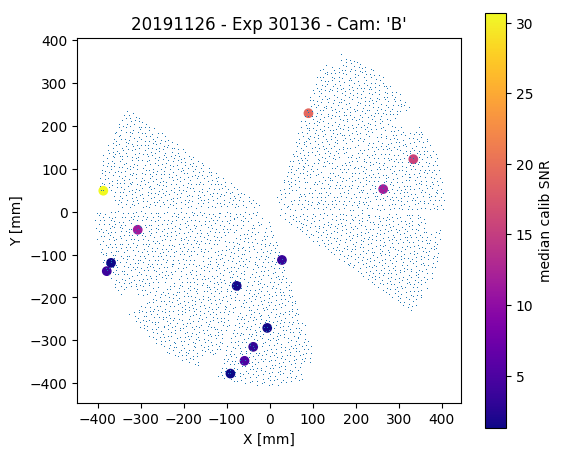

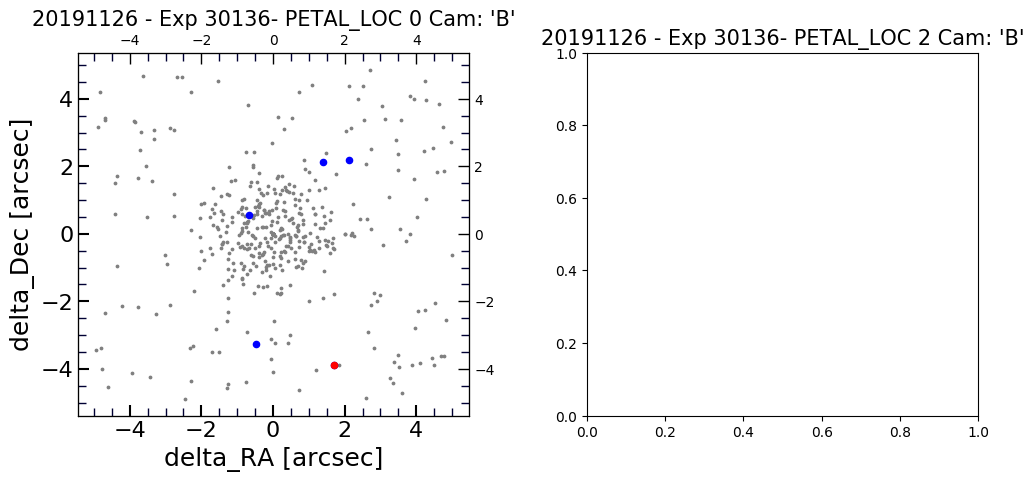

_________________________________________________________________________________

None of the fibers in qa-00030132.fits have landed on a source (snr >1.0) in petal 0
None of the fibers in qa-00030132.fits have landed on a source (snr >1.0) in petal 2


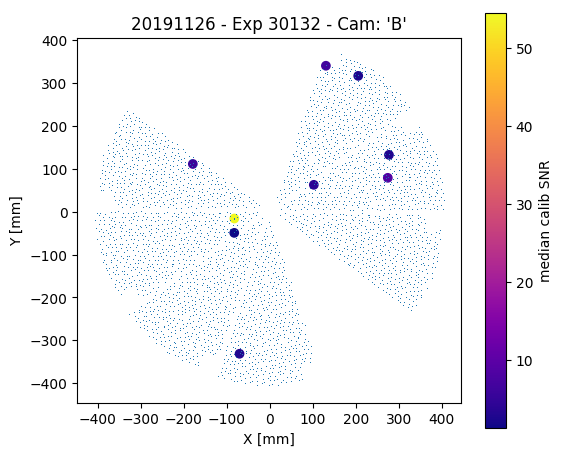

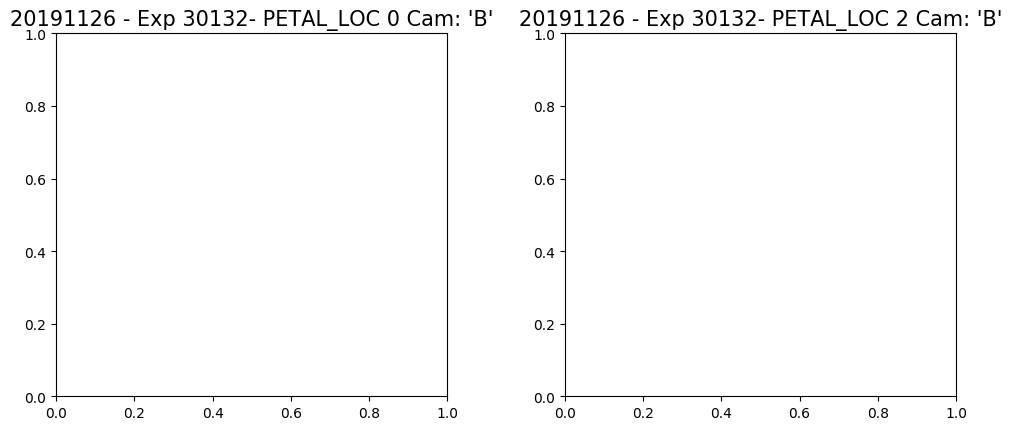

_________________________________________________________________________________



In [2]:
### plot_dither_seq_fc() in dither_plot.py does not use csv file. It uses the raw fiberassign output

tileid,obsday,petalnum_list,channel = 63068,'20191126',[0,2],b'B' 
nightwatch_dir='/exposures/nightwatch/'
fiberassign_dir = '/data/tiles/ALL_tiles/20191119/'

plotout_dir = './'
snr_thresh=0.5
seqlist = [30180,30156,30148,30140,30136,30132]


plot_dither_seq_fc(seqlist, obsday, petalnum_list, channel, tileid, nightwatch_dir, fiberassign_dir,plotout_dir,snr_thresh= 1.0)



# plot_dither_seq()

 This function takes the same list of inputs as**plot_dither_seq_fc()**  but only plots delta_ra, delta_dec plots for a list of petals but not the focal plane layout. 



In [ ]:
### plot_dither_seq() in dither_plot.py does not use csv file. It uses the raw fiberassign output

tileid,obsday,petalnum_list,channel = 63078,'20191219', [0, 2, 3, 4], 'B' 
nightwatch_dir='/exposures/nightwatch/'
fiberassign_dir = '/data/tiles/ALL_tiles/20191119/'
plotout_dir = './'
snr_thresh=0.5
seqlist = np.arange(33895, 33916, 2)

plot_dither_seq(seqlist, obsday, petalnum_list, channel, tileid, nightwatch_dir, \
                fiberassign_dir, plotout_dir, snr_thresh)


gfaseqlist is a set of GFA exposures matched to the spectrograph exposures in seqlist (possibly the same seqlist as you specified above)
refexpidx is the index of the gfa exposure in gfaseqlist that is at the starting position of the dither sequence. deltara,deltadec are computed relative to the RA,Dec (TARGETRA,TARGETDEC) of the telescope pointing during exposure 

I believe the deltas relative to the reference exposure will be correct even if we are moving the ADCs for the acquisition as long as we don't change it during the dither script



# Script to calculate $\Delta$ RA and $\Delta$ Dec  from PMX exposures

In [ ]:
from astropy.io import fits

def get_dra_ddec_from_exp(obsday, expidlist, unditheredidx, \
    nightwatch_dir = '/exposures/nightwatch/'):
    
    """Returns the delta RA and delta Dec 
    given a reference fits file and a seq
    of dithered fits files. All of these 
    files are assumed to be in 
    nightwatch_dir.
    
    Parameters
    ----------
    obsday : str
        observation date in yyyymmdd format
    expidlist : list
        list of exposure IDs; contains both
        dithered and undithered frames
    unditheredidx : integer
        location of the undithered exposure
        in expidlist
    nightwatch_dir : str
        Location of the directory
        
    Returns:
        printed values of delta RA and delta Dec
    """
    
    reffilename = nightwatch_dir + obsday + '/000'+\
        str(expidlist[unditheredidx])+'/qa-000'+\
        str(expidlist[unditheredidx])+'.fits'
    
    refhdu1 = fits.open(reffilename)
    refra = refhdu1['PRIMARY'].header['TARGTRA']
    refdec = refhdu1['PRIMARY'].header['TARGTDEC']
    
    for idx in range(len(expidlist)):
        fname = nightwatch_dir + obsday + '/000'+\
            str(expidlist[idx])+'/qa-000'+\
            str(expidlist[idx])+'.fits'
        hdu1 = fits.open(fname)
        raval = hdu1['PRIMARY'].header['TARGTRA']
        decval = hdu1['PRIMARY'].header['TARGTDEC']
        dra = (raval - refra)*3600 #convert to arcsec
        ddec = (decval - refdec)*3600
        print(f'Dithered expid {expidlist[idx]} deltaRA {dra} deltaDec {ddec}')

gfaseqlist is a set of GFA exposures matched to the spectrograph exposures in seqlist (possibly the same seqlist as you specified above)<br>
refexpidx is the index of the gfa exposure in gfaseqlist that is at the starting position of the dither sequence. deltara,deltadec are computed relative to the RA,Dec (TARGETRA,TARGETDEC) of the telescope pointing during exposure <br>
I believe the deltas relative to the reference exposure will be correct even if we are moving the ADCs for the acquisition as long as we don't change it during the dither script

# Script to calculate $\Delta$ RA and $\Delta$ Dec  from GFA exposures


Note that this function was used before the TARGETRA and TARGETDEC keys were addded to the headers of the spec exposures. No need to use this function now. **observers are to use get_dra_ddec_from_exp() as of December 18th 2019**

In [51]:
def getdradecfromgfaexp(gfaseqlist,seqlist, refexpidx,obsdate):
    reffilename = '/exposures/desi/' + obsdate + '/' + '{:08d}'.format(gfaseqlist[refexpidx]) + '/gfa-' + '{:08d}'.format(gfaseqlist[refexpidx]) + '.fits.fz'
    refhdul = fits.open(reffilename)
    refra = refhdul['GFA'].header['TARGTRA']
    refdec = refhdul['GFA'].header['TARGTDEC']
    for i in range(len(gfaseqlist)):
        filename = '/exposures/desi/' + obsdate + '/' + '{:08d}'.format(gfaseqlist[i]) + '/gfa-' + '{:08d}'.format(gfaseqlist[i]) + '.fits.fz'
        hdul = fits.open(filename)
        raval = hdul['GFA'].header['TARGTRA']
        decval = hdul['GFA'].header['TARGTDEC']
        dra = (raval-refra)*3600
        ddec = (decval - refdec)*3600
        print('Spec expid ' + str(seqlist[i]) + ' GFA expid ' + str(gfaseqlist[i]) + ' deltaRA ' + '{:8f}'.format(dra) + ' deltaDec ' + '{:8f}'.format(ddec))
    
        

In [63]:
gfaseqlist = [30155,30147,30139,30135,30131]
seqlist = [30156,30148,30140,30136,30132]
refexpidx = 4
print('reference exposure')
print(str(gfaseqlist[refexpidx]))

reference exposure
30131


In [64]:
getdradecfromgfaexp(gfaseqlist,seqlist,refexpidx,'20191126')

Spec expid 30156 GFA expid 30155 deltaRA 11.696400 deltaDec 0.003600
Spec expid 30148 GFA expid 30147 deltaRA -11.692800 deltaDec 0.000000
Spec expid 30140 GFA expid 30139 deltaRA 0.000000 deltaDec 10.000800
Spec expid 30136 GFA expid 30135 deltaRA 11.692800 deltaDec 10.000800
Spec expid 30132 GFA expid 30131 deltaRA 0.000000 deltaDec 0.000000
